# 获取数据

In [1]:
import  configparser
config = configparser.ConfigParser()
config.read('../config.ini')
token = config.get('tushare', 'token')

import tushare as ts
ts.set_token(token)

In [2]:
origin_daily_300 = ts.pro_bar(ts_code='000300.SH', asset='I').sort_values('trade_date')
daily_300 = origin_daily_300.copy()
daily_300

,ts_code,trade_date,close,open,high,low,pre_close,change,pct_chg,vol,amount
4145,000300.SH,20050104,982.7940,994.7690,994.7690,980.6580,1000.0000,-17.2060,-1.7206,7.412869e+06,4.431977e+06
4144,000300.SH,20050105,992.5640,981.5770,997.3230,979.8770,982.7940,9.7700,0.9941,7.119109e+06,4.529208e+06
4143,000300.SH,20050106,983.1740,993.3310,993.7880,980.3300,992.5640,-9.3900,-0.9460,6.288029e+06,3.921015e+06
4142,000300.SH,20050107,983.9580,983.0450,995.7110,979.8120,983.1740,0.7840,0.0797,7.298694e+06,4.737469e+06
4141,000300.SH,20050110,993.8790,983.7600,993.9590,979.7890,983.9580,9.9210,1.0083,5.791698e+06,3.762933e+06
...,...,...,...,...,...,...,...,...,...,...,...
4,000300.SH,20220117,4767.2762,4728.7595,4775.2385,4726.7083,4726.7317,40.5445,0.8578,1.152957e+08,2.637882e+08
3,000300.SH,20220118,4813.3472,4766.7811,4826.3003,4747.9200,4767.2762,46.0710,0.9664,1.508708e+08,2.827494e+08
2,000300.SH,20220119,4780.3784,4815.8106,4828.7522,4755.9301,4813.3472,-32.9688,-0.6849,1.339274e+08,2.755346e+08
1,000300.SH,20220120,4823.5091,4778.2616,4845.0048,4777.5683,4780.3784,43.1307,0.9022,1.649713e+08,3.043443e+08


# 计算指标
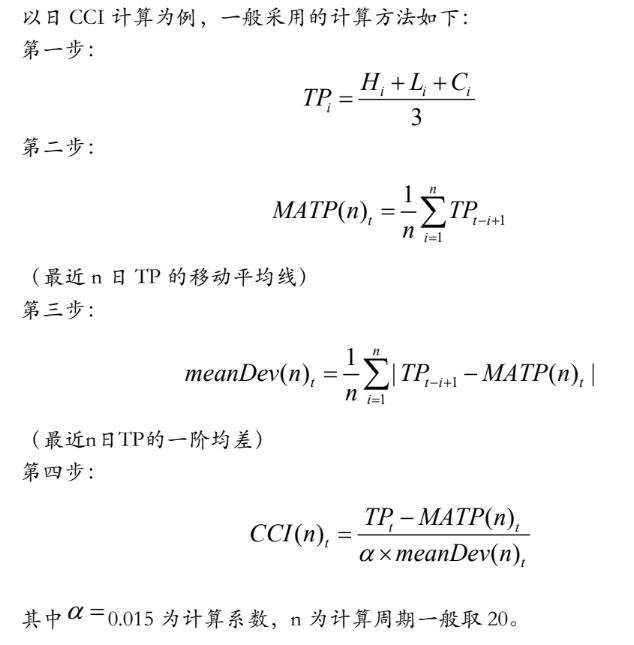

In [3]:
import pandas_ta as ta
import numpy as np
import pandas as pd

In [4]:
pd.DataFrame().ta.indicators()

Pandas TA - Technical Analysis Indicators - v0.3.14b0
Total Indicators & Utilities: 205
Abbreviations:
    aberration, above, above_value, accbands, ad, adosc, adx, alma, amat, ao, aobv, apo, aroon, atr, bbands, below, below_value, bias, bop, brar, cci, cdl_pattern, cdl_z, cfo, cg, chop, cksp, cmf, cmo, coppock, cross, cross_value, cti, decay, decreasing, dema, dm, donchian, dpo, ebsw, efi, ema, entropy, eom, er, eri, fisher, fwma, ha, hilo, hl2, hlc3, hma, hwc, hwma, ichimoku, increasing, inertia, jma, kama, kc, kdj, kst, kurtosis, kvo, linreg, log_return, long_run, macd, mad, massi, mcgd, median, mfi, midpoint, midprice, mom, natr, nvi, obv, ohlc4, pdist, percent_return, pgo, ppo, psar, psl, pvi, pvo, pvol, pvr, pvt, pwma, qqe, qstick, quantile, rma, roc, rsi, rsx, rvgi, rvi, short_run, sinwma, skew, slope, sma, smi, squeeze, squeeze_pro, ssf, stc, stdev, stoch, stochrsi, supertrend, swma, t3, td_seq, tema, thermo, tos_stdevall, trima, trix, true_range, tsi, tsignals, ttm_trend, ui, 

In [5]:
def calc_cci(mkt_data, n=20, alpha=0.015):
    high = mkt_data['high']
    low = mkt_data['low']
    close = mkt_data['close']
    """ 指标计算 """
    # pandas_ta
    cci = ta.cci(high, low, close, length=n, c=alpha)
    # 自行计算
    #TP = (high+low+close)/3
    #MATP = TP.rolling(n).mean()
    #meanDev =TP.rolling(n).agg(lambda x: abs(x-x.mean()).mean() )
    #cci = (TP-MATP)/(alpha * meanDev)
    """ 指标赋值 """
    #mkt_data['TP'] = TP
    #mkt_data['MATP'] = MATP
    #mkt_data['meanDev'] = meanDev
    mkt_data['CCI'] = cci
    return mkt_data

In [6]:
daily_300 = calc_cci(daily_300)
daily_300[:40]

,ts_code,trade_date,close,open,high,low,pre_close,change,pct_chg,vol,amount,CCI
4145,000300.SH,20050104,982.794,994.769,994.769,980.658,1000.000,-17.206,-1.7206,7412868.94,4.431977e+06,NaN
4144,000300.SH,20050105,992.564,981.577,997.323,979.877,982.794,9.770,0.9941,7119108.98,4.529208e+06,NaN
4143,000300.SH,20050106,983.174,993.331,993.788,980.330,992.564,-9.390,-0.9460,6288029.05,3.921015e+06,NaN
4142,000300.SH,20050107,983.958,983.045,995.711,979.812,983.174,0.784,0.0797,7298694.09,4.737469e+06,NaN
4141,000300.SH,20050110,993.879,983.760,993.959,979.789,983.958,9.921,1.0083,5791697.99,3.762933e+06,NaN
4140,000300.SH,20050111,997.135,994.189,999.554,991.092,993.879,3.256,0.3276,5849079.98,3.704077e+06,NaN
4139,000300.SH,20050112,996.748,996.651,996.976,989.257,997.135,-0.387,-0.0388,5014525.09,3.093300e+06,NaN
4138,000300.SH,20050113,996.877,996.078,999.473,992.695,996.748,0.129,0.0129,6044065.84,3.842173e+06,NaN
4137,000300.SH,20050114,988.306,996.617,1006.463,987.233,996.877,-8.571,-0.8598,7297842.38,4.162921e+06,NaN
4136,000300.SH,20050117,967.452,979.111,981.525,965.078,988.306,-20.854,-2.1101,7288188.76,4.249808e+06,NaN


# 计算信号
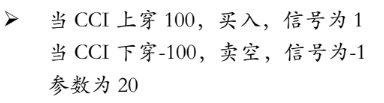

In [7]:
def calc_signal(mkt_data):
    CCI = mkt_data['CCI']

    signals = []
    for cci, pre_cci in zip(CCI, CCI.shift(1)):
        signal = None
        if pre_cci<100 and cci>=100:
            signal = 1
        elif pre_cci>-100 and cci<=-100:
            signal = -1
        signals.append(signal)
    mkt_data['signal'] = signals
    return mkt_data

In [8]:
daily_300 = calc_signal(daily_300)
daily_300

,ts_code,trade_date,close,open,high,low,pre_close,change,pct_chg,vol,amount,CCI,signal
4145,000300.SH,20050104,982.7940,994.7690,994.7690,980.6580,1000.0000,-17.2060,-1.7206,7.412869e+06,4.431977e+06,NaN,NaN
4144,000300.SH,20050105,992.5640,981.5770,997.3230,979.8770,982.7940,9.7700,0.9941,7.119109e+06,4.529208e+06,NaN,NaN
4143,000300.SH,20050106,983.1740,993.3310,993.7880,980.3300,992.5640,-9.3900,-0.9460,6.288029e+06,3.921015e+06,NaN,NaN
4142,000300.SH,20050107,983.9580,983.0450,995.7110,979.8120,983.1740,0.7840,0.0797,7.298694e+06,4.737469e+06,NaN,NaN
4141,000300.SH,20050110,993.8790,983.7600,993.9590,979.7890,983.9580,9.9210,1.0083,5.791698e+06,3.762933e+06,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,000300.SH,20220117,4767.2762,4728.7595,4775.2385,4726.7083,4726.7317,40.5445,0.8578,1.152957e+08,2.637882e+08,-138.041953,NaN
3,000300.SH,20220118,4813.3472,4766.7811,4826.3003,4747.9200,4767.2762,46.0710,0.9664,1.508708e+08,2.827494e+08,-80.296240,NaN
2,000300.SH,20220119,4780.3784,4815.8106,4828.7522,4755.9301,4813.3472,-32.9688,-0.6849,1.339274e+08,2.755346e+08,-79.568005,NaN
1,000300.SH,20220120,4823.5091,4778.2616,4845.0048,4777.5683,4780.3784,43.1307,0.9022,1.649713e+08,3.043443e+08,-44.767590,NaN


# 计算持仓

In [9]:
def calc_position(mkt_data):
    mkt_data['position'] = mkt_data['signal'].fillna(method='ffill').shift(1).fillna(0)
    return mkt_data

In [10]:
daily_300 = calc_position(daily_300)
daily_300

,ts_code,trade_date,close,open,high,low,pre_close,change,pct_chg,vol,amount,CCI,signal,position
4145,000300.SH,20050104,982.7940,994.7690,994.7690,980.6580,1000.0000,-17.2060,-1.7206,7.412869e+06,4.431977e+06,NaN,NaN,0.0
4144,000300.SH,20050105,992.5640,981.5770,997.3230,979.8770,982.7940,9.7700,0.9941,7.119109e+06,4.529208e+06,NaN,NaN,0.0
4143,000300.SH,20050106,983.1740,993.3310,993.7880,980.3300,992.5640,-9.3900,-0.9460,6.288029e+06,3.921015e+06,NaN,NaN,0.0
4142,000300.SH,20050107,983.9580,983.0450,995.7110,979.8120,983.1740,0.7840,0.0797,7.298694e+06,4.737469e+06,NaN,NaN,0.0
4141,000300.SH,20050110,993.8790,983.7600,993.9590,979.7890,983.9580,9.9210,1.0083,5.791698e+06,3.762933e+06,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,000300.SH,20220117,4767.2762,4728.7595,4775.2385,4726.7083,4726.7317,40.5445,0.8578,1.152957e+08,2.637882e+08,-138.041953,NaN,-1.0
3,000300.SH,20220118,4813.3472,4766.7811,4826.3003,4747.9200,4767.2762,46.0710,0.9664,1.508708e+08,2.827494e+08,-80.296240,NaN,-1.0
2,000300.SH,20220119,4780.3784,4815.8106,4828.7522,4755.9301,4813.3472,-32.9688,-0.6849,1.339274e+08,2.755346e+08,-79.568005,NaN,-1.0
1,000300.SH,20220120,4823.5091,4778.2616,4845.0048,4777.5683,4780.3784,43.1307,0.9022,1.649713e+08,3.043443e+08,-44.767590,NaN,-1.0


# 计算结果

In [11]:
def statistic_performance(mkt_data, r0=0.03, data_period=1440):
    position = mkt_data['position']
    
    """      序列型特征 
        hold_r :      持仓收益
        hold_win :    持仓胜负
        hold_cumu_r : 累计持仓收益
        drawdown :    回撤
        ex_hold_r :   超额收益
    """
    hold_r = mkt_data['pct_chg']/100 * position
    hold_win = hold_r>0
    hold_cumu_r = (1+hold_r).cumprod() - 1
    drawdown = (hold_cumu_r.cummax()-hold_cumu_r)/(1+hold_cumu_r).cummax()    
    ex_hold_r= hold_r-r0/(250*1440/data_period)

    mkt_data['hold_r'] = hold_r
    mkt_data['hold_win'] = hold_win
    mkt_data['hold_cumu_r'] = hold_cumu_r
    mkt_data['drawdown'] = drawdown
    mkt_data['ex_hold_r'] = ex_hold_r
    
    """       数值型特征 
        v_hold_cumu_r：         累计持仓收益
        v_pos_hold_times：      多仓开仓次数
        v_pos_hold_win_times：  多仓开仓盈利次数
        v_pos_hold_period：     多仓持有周期数
        v_pos_hold_win_period： 多仓持有盈利周期数
        v_neg_hold_times：      空仓开仓次数
        v_neg_hold_win_times：  空仓开仓盈利次数
        v_neg_hold_period：     空仓持有盈利周期数
        v_neg_hold_win_period： 空仓开仓次数
        v_hold_period：         持仓周期数（最后一笔未平仓订单也算）
        v_hold_win_period：     持仓盈利周期数（最后一笔未平仓订单也算）
        v_max_dd：              最大回撤
        v_annual_std：          年化标准差
        v_annual_ret：          年化收益
        v_sharpe：              夏普率
    """
    v_hold_cumu_r = hold_cumu_r.tolist()[-1]

    v_pos_hold_times= 0 
    v_pos_hold_win_times = 0
    v_pos_hold_period = 0
    v_pos_hold_win_period = 0
    v_neg_hold_times= 0 
    v_neg_hold_win_times = 0
    v_neg_hold_period = 0
    v_neg_hold_win_period = 0
    for w, r, pre_pos, pos in zip(hold_win, hold_r, position.shift(1), position):
        # 有换仓（先结算上一次持仓，再初始化本次持仓）
        if pre_pos!=pos: 
            # 判断pre_pos非空：若为空则是循环的第一次，此时无需结算，直接初始化持仓即可
            if pre_pos == pre_pos:
                # 结算上一次持仓
                if pre_pos>0:
                    v_pos_hold_times += 1
                    v_pos_hold_period += tmp_hold_period
                    v_pos_hold_win_period += tmp_hold_win_period
                    if tmp_hold_r>0:
                        v_pos_hold_win_times+=1
                elif pre_pos<0:
                    v_neg_hold_times += 1      
                    v_neg_hold_period += tmp_hold_period
                    v_neg_hold_win_period += tmp_hold_win_period
                    if tmp_hold_r>0:                    
                        v_neg_hold_win_times+=1
            # 初始化本次持仓
            tmp_hold_r = r
            tmp_hold_period = 0
            tmp_hold_win_period = 0
        else: # 未换仓
            if abs(pos)>0:
                tmp_hold_period += 1
                if r>0:
                    tmp_hold_win_period += 1
                if abs(r)>0:
                    tmp_hold_r = (1+tmp_hold_r)*(1+r)-1       

    v_hold_period = (abs(position)>0).sum()
    v_hold_win_period = (hold_r>0).sum()
    v_max_dd = drawdown.max()    
    v_annual_ret = pow( 1+v_hold_cumu_r, 
                      1/(data_period/1440*len(mkt_data)/250) )-1
    v_annual_std = ex_hold_r.std() * np.sqrt(250*1440/data_period) 
    v_sharpe= v_annual_ret / v_annual_std

    """ 生成Performance DataFrame """
    performance_cols = ['累计收益', 
                        '多仓次数', '多仓胜率', '多仓平均持有期', 
                        '空仓次数', '空仓胜率', '空仓平均持有期', 
                        '日胜率', '最大回撤', '年化收益/最大回撤',
                        '年化收益', '年化标准差', '年化夏普'
                       ]
    performance_values = ['{:.2%}'.format(v_hold_cumu_r),
                          v_pos_hold_times, '{:.2%}'.format(v_pos_hold_win_times/v_pos_hold_times), 
                                            '{:.2f}'.format(v_pos_hold_period/v_pos_hold_times),
                          v_neg_hold_times, '{:.2%}'.format(v_neg_hold_win_times/v_neg_hold_times), 
                                            '{:.2f}'.format(v_neg_hold_period/v_neg_hold_times),
                          '{:.2%}'.format(v_hold_win_period/v_hold_period), 
                          '{:.2%}'.format(v_max_dd), 
                          '{:.2f}'.format(v_annual_ret/v_max_dd),
                          '{:.2%}'.format(v_annual_ret), 
                          '{:.2%}'.format(v_annual_std), 
                          '{:.2f}'.format(v_sharpe)
                         ]
    performance_df = pd.DataFrame(performance_values, index=performance_cols)
    return mkt_data, performance_df

# 可视化结果

In [12]:
import datetime
from bokeh.plotting import figure, show, output_notebook
from bokeh.layouts import column, row, gridplot, layout
from bokeh.models import Span
output_notebook()

Loading BokehJS ...

In [13]:
def visualize_performance(mkt_data):
    mkt_data['trade_datetime'] = mkt_data['trade_date'].apply(lambda x: datetime.datetime.strptime(x, '%Y%m%d'))
    dt = mkt_data['trade_datetime']

    f1 = figure(height=300, width=700, 
                sizing_mode='stretch_width', 
                title='Target Trend',
                x_axis_type='datetime',
                x_axis_label="trade_datetime", y_axis_label="close")
    f2 = figure(height=200, sizing_mode='stretch_width', 
                title='Position',
                x_axis_label="trade_datetime", y_axis_label="position",
                x_axis_type='datetime',
                x_range=f1.x_range)
    f3 = figure(height=200, sizing_mode='stretch_width', 
                title='Return',
                x_axis_type='datetime',
                x_range=f1.x_range)
    f4 = figure(height=200, sizing_mode='stretch_width', 
                title='Drawdown',
                x_axis_type='datetime',
                x_range=f1.x_range)

    

    # 绘制行情
    close = mkt_data['close']
    cumu_hold_close = (mkt_data['hold_cumu_r']+1)
    f1.line(dt, close/close.tolist()[0], line_width=1)
    f1.line(dt, cumu_hold_close, line_width=1, color='red')

    # 绘制指标
    #indi = figure(height=200, sizing_mode='stretch_width', 
    #              title='KDJ',
    #              x_axis_type='datetime',
    #              x_range=f1.x_range
    #             )
    
    # 绘制仓位
    position = mkt_data['position']
    f2.step(dt, position)

    # 绘制收益
    hold_r = mkt_data['hold_r']
    f3.vbar(x=dt, top=hold_r)

    # 绘制回撤
    drawdown = mkt_data['drawdown']
    f4.line(dt, -drawdown, line_width=1)

    #p = column(f1,f2,f3,f4)
    p = gridplot([ [f1],
                   #[indi],
                   [f2], 
                   [f3],
                   [f4]
                 ])
    show(p)

# 整体执行

In [14]:
daily_300 = calc_cci(daily_300, n=27)
daily_300 = calc_signal(daily_300)
daily_300 = calc_position(daily_300)
daily_300

,ts_code,trade_date,close,open,high,low,pre_close,change,pct_chg,vol,amount,CCI,signal,position
4145,000300.SH,20050104,982.7940,994.7690,994.7690,980.6580,1000.0000,-17.2060,-1.7206,7.412869e+06,4.431977e+06,NaN,NaN,0.0
4144,000300.SH,20050105,992.5640,981.5770,997.3230,979.8770,982.7940,9.7700,0.9941,7.119109e+06,4.529208e+06,NaN,NaN,0.0
4143,000300.SH,20050106,983.1740,993.3310,993.7880,980.3300,992.5640,-9.3900,-0.9460,6.288029e+06,3.921015e+06,NaN,NaN,0.0
4142,000300.SH,20050107,983.9580,983.0450,995.7110,979.8120,983.1740,0.7840,0.0797,7.298694e+06,4.737469e+06,NaN,NaN,0.0
4141,000300.SH,20050110,993.8790,983.7600,993.9590,979.7890,983.9580,9.9210,1.0083,5.791698e+06,3.762933e+06,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,000300.SH,20220117,4767.2762,4728.7595,4775.2385,4726.7083,4726.7317,40.5445,0.8578,1.152957e+08,2.637882e+08,-146.831403,NaN,-1.0
3,000300.SH,20220118,4813.3472,4766.7811,4826.3003,4747.9200,4767.2762,46.0710,0.9664,1.508708e+08,2.827494e+08,-101.845843,NaN,-1.0
2,000300.SH,20220119,4780.3784,4815.8106,4828.7522,4755.9301,4813.3472,-32.9688,-0.6849,1.339274e+08,2.755346e+08,-99.154571,NaN,-1.0
1,000300.SH,20220120,4823.5091,4778.2616,4845.0048,4777.5683,4780.3784,43.1307,0.9022,1.649713e+08,3.043443e+08,-67.693877,NaN,-1.0


In [15]:
# 评价和展现
#result_daily_300, performance_df = statistic_performance(daily_300)
#result_daily_300, performance_df = statistic_performance(daily_300[daily_300['trade_date'].apply(lambda x: x>='20050901' and x<='20120315')])
result_daily_300, performance_df = statistic_performance(daily_300[daily_300['trade_date'].apply(lambda x: x>='20120315')])

visualize_performance(result_daily_300)
print(performance_df)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pand

                0
累计收益       31.60%
多仓次数           33
多仓胜率       42.42%
多仓平均持有期     39.30
空仓次数           32
空仓胜率       31.25%
空仓平均持有期     32.06
日胜率        51.52%
最大回撤       40.15%
年化收益/最大回撤    0.07
年化收益        2.90%
年化标准差      22.52%
年化夏普         0.13


# 策略优化
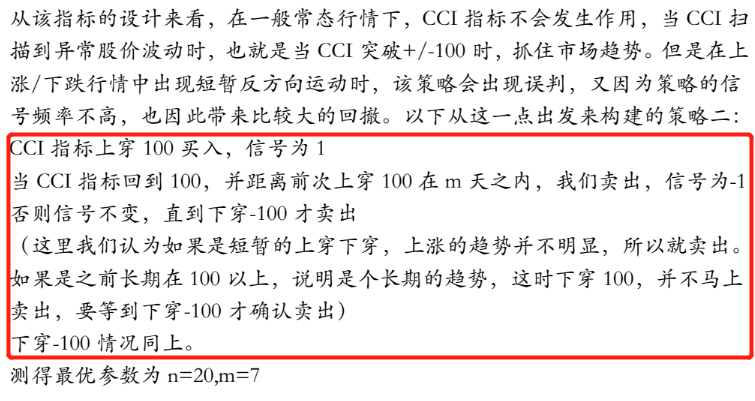

In [60]:
def calc_signal(mkt_data, filter_m=7):
    CCI = mkt_data['CCI']
    
    signals = []
    hold_period = 0
    for cci, pre_cci in zip(CCI, CCI.shift(1)):
        signal = None
        hold_period += 1
        if pre_cci<100 and cci>=100:
            signal = 1
            hold_period = 0
        elif pre_cci>-100 and cci<=-100:
            signal = -1
            hold_period = 0
        elif pre_cci>=100 and cci<100 and hold_period<=filter_m:
            signal = -1
        elif pre_cci<=-100 and cci>-100 and hold_period<=filter_m:
            signal = 1
        signals.append(signal)
    mkt_data['signal'] = signals
    return mkt_data

In [61]:
daily_300 = calc_cci(daily_300, n=20)
daily_300 = calc_signal(daily_300, filter_m=7)
daily_300 = calc_position(daily_300)
daily_300

,ts_code,trade_date,close,open,high,low,pre_close,change,pct_chg,vol,amount,CCI,TP,MATP,meanDev,signal,position
4145,000300.SH,20050104,982.7940,994.7690,994.7690,980.6580,1000.0000,-17.2060,-1.7206,7.412869e+06,4.431977e+06,NaN,986.073667,NaN,NaN,NaN,0.0
4144,000300.SH,20050105,992.5640,981.5770,997.3230,979.8770,982.7940,9.7700,0.9941,7.119109e+06,4.529208e+06,NaN,989.921333,NaN,NaN,NaN,0.0
4143,000300.SH,20050106,983.1740,993.3310,993.7880,980.3300,992.5640,-9.3900,-0.9460,6.288029e+06,3.921015e+06,NaN,985.764000,NaN,NaN,NaN,0.0
4142,000300.SH,20050107,983.9580,983.0450,995.7110,979.8120,983.1740,0.7840,0.0797,7.298694e+06,4.737469e+06,NaN,986.493667,NaN,NaN,NaN,0.0
4141,000300.SH,20050110,993.8790,983.7600,993.9590,979.7890,983.9580,9.9210,1.0083,5.791698e+06,3.762933e+06,NaN,989.209000,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,000300.SH,20220117,4767.2762,4728.7595,4775.2385,4726.7083,4726.7317,40.5445,0.8578,1.152957e+08,2.637882e+08,-138.041953,4756.407667,4871.303830,55.488524,NaN,-1.0
3,000300.SH,20220118,4813.3472,4766.7811,4826.3003,4747.9200,4767.2762,46.0710,0.9664,1.508708e+08,2.827494e+08,-80.296240,4795.855833,4865.683703,57.975210,NaN,-1.0
2,000300.SH,20220119,4780.3784,4815.8106,4828.7522,4755.9301,4813.3472,-32.9688,-0.6849,1.339274e+08,2.755346e+08,-79.568005,4788.353567,4860.030818,60.055338,NaN,-1.0
1,000300.SH,20220120,4823.5091,4778.2616,4845.0048,4777.5683,4780.3784,43.1307,0.9022,1.649713e+08,3.043443e+08,-44.767590,4815.360733,4854.893977,58.871821,NaN,-1.0


In [62]:
# 评价和展现
#result_daily_300, performance_df = statistic_performance(daily_300)
result_daily_300, performance_df = statistic_performance(daily_300[daily_300['trade_date'].apply(lambda x: x>='20050901' and x<='20120315')])
#result_daily_300, performance_df = statistic_performance(daily_300[daily_300['trade_date'].apply(lambda x: x>='20120315')])

visualize_performance(result_daily_300)
print(performance_df)

<ipython-input-31-429b162b44bd>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mkt_data['hold_r'] = hold_r
<ipython-input-31-429b162b44bd>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mkt_data['hold_win'] = hold_win
<ipython-input-31-429b162b44bd>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.

                  0
累计收益       1507.96%
多仓次数             86
多仓胜率         45.35%
多仓平均持有期        9.40
空仓次数             85
空仓胜率         37.65%
空仓平均持有期        7.08
日胜率          56.30%
最大回撤         27.13%
年化收益/最大回撤      2.02
年化收益         54.85%
年化标准差        31.65%
年化夏普           1.73


# 参数稳定性

## 基础策略

In [77]:
def calc_signal(mkt_data):
    CCI = mkt_data['CCI']

    signals = []
    for cci, pre_cci in zip(CCI, CCI.shift(1)):
        signal = None
        if pre_cci<100 and cci>=100:
            signal = 1
        elif pre_cci>-100 and cci<=-100:
            signal = -1
        signals.append(signal)
    mkt_data['signal'] = signals
    return mkt_data

In [78]:
def get_rolling_best_N(mkt_data, default_n=20, 
                       alternative_ns=[10,11,12,13,14,15,16,17,18,19,20], 
                       choice_period=125):
    """ 生成一个dict，存放所有参数下生成的mkt_data """
    alternative_dict = {}
    for n in alternative_ns:
        mkt_data = calc_cci(mkt_data, n=n)
        mkt_data = calc_signal(mkt_data)
        mkt_data = calc_position(mkt_data)
        mkt_data['hold_r'] = mkt_data['position'] * mkt_data['pct_chg']/100
        mkt_data['cumu_hold_nv'] = (1+mkt_data['hold_r']).cumprod()
        alternative_dict[n] = mkt_data.copy()
        
    """ 从choice_period + default_n开始，选择前choice_period期表现最好的策略的signal """
    cumu_hold_nv_df = pd.concat([alternative_dict[n][['cumu_hold_nv']] for n in alternative_ns], 
                                axis=1)
    cumu_hold_nv_df.columns=alternative_ns
    position_df = pd.concat([alternative_dict[n][['position']] for n in alternative_ns], 
                            axis=1)
    position_df.columns=alternative_ns
    
    best_Ns = [default_n] * len(mkt_data)
    best_positions = position_df[default_n].tolist()
    for idx in range(len(mkt_data)-choice_period-1):
        """取 idx - idx+choice_period 共 choice_period条数据"""
        tmp_cumu_hold_nv_df = cumu_hold_nv_df[idx:idx+choice_period]
        """比较不同n下的 hold_cumu_r/max_dd 的值"""
        tmp_comp_res = pd.DataFrame([[tmp_cumu_hold_nv_df[n].values[-1]/tmp_cumu_hold_nv_df[n].values[0]-1 for n in alternative_ns],
                                     [(1-tmp_cumu_hold_nv_df[n]/tmp_cumu_hold_nv_df[n].cummax()).max() for n in alternative_ns]
                                    ],
                                     columns=alternative_ns, 
                                     index=['hold_cumu_r', 'max_dd']).T
        tmp_comp_res['value'] = tmp_comp_res['hold_cumu_r']/tmp_comp_res['max_dd']
        """选取hold_cumu_r/max_dd最大的参数作为当期best_N，并将其下期的position作为下期的best_pos"""
        best_N = tmp_comp_res.sort_values(by='value', ascending=False).index[0]
        best_pos = position_df[best_N][idx+choice_period]
        best_Ns[idx+choice_period-1] = best_N
        best_positions[idx+choice_period] = best_pos
    best_Ns = pd.Series(best_Ns, index=mkt_data['trade_date']) 
    best_positions = pd.Series(best_positions, index=mkt_data['trade_date']) 
    return best_Ns, best_positions

In [79]:
default_n = 20
alternative_ns = [15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30]
choice_period = 125

best_Ns, best_positions = get_rolling_best_N( daily_300, 
                                              default_n=default_n, 
                                              alternative_ns=alternative_ns, 
                                              choice_period=choice_period)
print(best_Ns[choice_period:].value_counts())
daily_300['position'] = best_positions.values

15    634
25    447
17    440
16    345
29    338
27    244
30    229
23    224
18    206
22    199
28    180
19    135
26    119
20     98
24     95
21     88
dtype: int64


In [80]:
#result_daily_300, performance_df = statistic_performance(daily_300)
#result_daily_300, performance_df = statistic_performance(daily_300[daily_300['trade_date'].apply(lambda x: x>='20050901' and x<='20120315')])
result_daily_300, performance_df = statistic_performance(daily_300[daily_300['trade_date'].apply(lambda x: x>='20120315')])

visualize_performance(result_daily_300)
print(performance_df)

<ipython-input-31-429b162b44bd>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mkt_data['hold_r'] = hold_r
<ipython-input-31-429b162b44bd>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mkt_data['hold_win'] = hold_win
<ipython-input-31-429b162b44bd>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.

                0
累计收益       84.18%
多仓次数           44
多仓胜率       61.36%
多仓平均持有期     27.93
空仓次数           43
空仓胜率       44.19%
空仓平均持有期     24.63
日胜率        52.44%
最大回撤       41.13%
年化收益/最大回撤    0.16
年化收益        6.57%
年化标准差      22.47%
年化夏普         0.29


## 优化策略

In [81]:
def calc_signal(mkt_data, filter_m=7):
    CCI = mkt_data['CCI']
    signals = []
    hold_period = 0
    for cci, pre_cci in zip(CCI, CCI.shift(1)):
        signal = None
        hold_period += 1
        if pre_cci<100 and cci>=100:
            signal = 1
            hold_period = 0
        elif pre_cci>-100 and cci<=-100:
            signal = -1
            hold_period = 0
        elif pre_cci>=100 and cci<100 and hold_period<=filter_m:
            signal = -1
        elif pre_cci<=-100 and cci>-100 and hold_period<=filter_m:
            signal = 1
        signals.append(signal)
    mkt_data['signal'] = signals
    return mkt_data

In [82]:
def get_rolling_best_N(mkt_data, default_n=20, 
                       alternative_ns=[10,11,12,13,14,15,16,17,18,19,20], 
                       choice_period=125):
    """ 生成一个dict，存放所有参数下生成的mkt_data """
    alternative_dict = {}
    for n in alternative_ns:
        mkt_data = calc_cci(mkt_data, n=n)
        mkt_data = calc_signal(mkt_data, filter_m=7)
        mkt_data = calc_position(mkt_data)
        mkt_data['hold_r'] = mkt_data['position'] * mkt_data['pct_chg']/100
        mkt_data['cumu_hold_nv'] = (1+mkt_data['hold_r']).cumprod()
        alternative_dict[n] = mkt_data.copy()
        
    """ 从choice_period + default_n开始，选择前choice_period期表现最好的策略的signal """
    cumu_hold_nv_df = pd.concat([alternative_dict[n][['cumu_hold_nv']] for n in alternative_ns], 
                                axis=1)
    cumu_hold_nv_df.columns=alternative_ns
    position_df = pd.concat([alternative_dict[n][['position']] for n in alternative_ns], 
                            axis=1)
    position_df.columns=alternative_ns
    
    best_Ns = [default_n] * len(mkt_data)
    best_positions = position_df[default_n].tolist()
    for idx in range(len(mkt_data)-choice_period-1):
        """取 idx - idx+choice_period 共 choice_period条数据"""
        tmp_cumu_hold_nv_df = cumu_hold_nv_df[idx:idx+choice_period]
        """比较不同n下的 hold_cumu_r/max_dd 的值"""
        tmp_comp_res = pd.DataFrame([[tmp_cumu_hold_nv_df[n].values[-1]/tmp_cumu_hold_nv_df[n].values[0]-1 for n in alternative_ns],
                                     [(1-tmp_cumu_hold_nv_df[n]/tmp_cumu_hold_nv_df[n].cummax()).max() for n in alternative_ns]
                                    ],
                                     columns=alternative_ns, 
                                     index=['hold_cumu_r', 'max_dd']).T
        tmp_comp_res['value'] = tmp_comp_res['hold_cumu_r']/tmp_comp_res['max_dd']
        """选取hold_cumu_r/max_dd最大的参数作为当期best_N，并将其下期的position作为下期的best_pos"""
        best_N = tmp_comp_res.sort_values(by='value', ascending=False).index[0]
        best_pos = position_df[best_N][idx+choice_period]
        best_Ns[idx+choice_period-1] = best_N
        best_positions[idx+choice_period] = best_pos
    best_Ns = pd.Series(best_Ns, index=mkt_data['trade_date']) 
    best_positions = pd.Series(best_positions, index=mkt_data['trade_date']) 
    return best_Ns, best_positions

In [83]:
default_n = 20
alternative_ns = [15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30]
choice_period = 125

best_Ns, best_positions = get_rolling_best_N( daily_300, 
                                              default_n=default_n, 
                                              alternative_ns=alternative_ns, 
                                              choice_period=choice_period)
print(best_Ns[choice_period:].value_counts())
daily_300['position'] = best_positions.values

15    718
30    612
23    407
28    287
18    264
17    263
19    250
20    213
16    206
27    206
24    114
29    110
26    107
22    102
21     84
25     78
dtype: int64


In [84]:
#result_daily_300, performance_df = statistic_performance(daily_300)
#result_daily_300, performance_df = statistic_performance(daily_300[daily_300['trade_date'].apply(lambda x: x>='20050901' and x<='20120315')])
result_daily_300, performance_df = statistic_performance(daily_300[daily_300['trade_date'].apply(lambda x: x>='20120315')])

visualize_performance(result_daily_300)
print(performance_df)

<ipython-input-31-429b162b44bd>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mkt_data['hold_r'] = hold_r
<ipython-input-31-429b162b44bd>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mkt_data['hold_win'] = hold_win
<ipython-input-31-429b162b44bd>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.

                 0
累计收益       149.34%
多仓次数           149
多仓胜率        54.36%
多仓平均持有期       7.36
空仓次数           149
空仓胜率        49.66%
空仓平均持有期       6.54
日胜率         52.72%
最大回撤        45.12%
年化收益/最大回撤     0.22
年化收益         9.99%
年化标准差       22.45%
年化夏普          0.44
